In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab/Titanic

/content/drive/My Drive/Colab/Titanic


# Titanic Survival prediction

### Importing the libraries

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


### Loading the data

In [0]:
train = pd.read_csv("train.csv")

In [150]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [0]:
train['Age'] = train['Age'].astype(int)

In [0]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

In [0]:
test = pd.read_csv("test.csv")

In [156]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


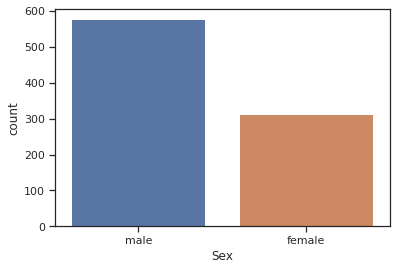

In [157]:
sns.countplot(train['Sex'])

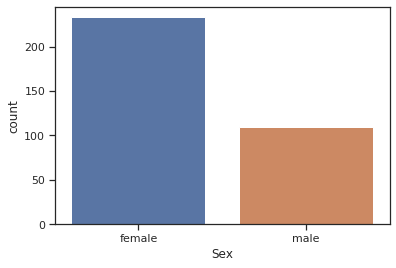

In [158]:
sns.countplot(train['Sex'][train['Survived'] == 1])

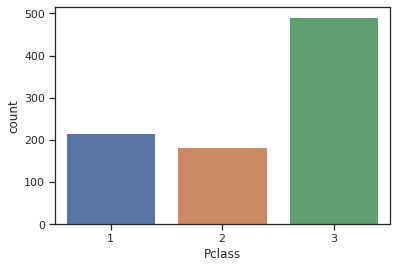

In [159]:
sns.countplot(train['Pclass'])

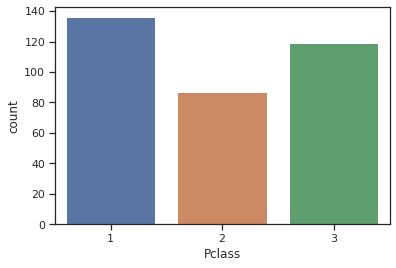

In [160]:
sns.countplot(train['Pclass'][train['Survived'] == 1])

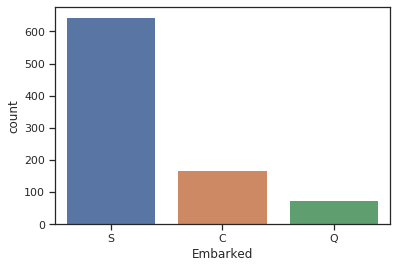

In [161]:
sns.countplot(train['Embarked'])

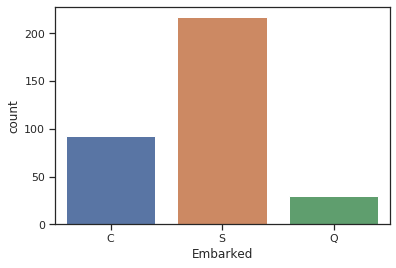

In [162]:
sns.countplot(train['Embarked'][train['Survived'] == 1])

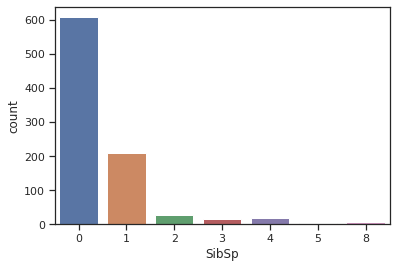

In [163]:
sns.countplot(train['SibSp'])

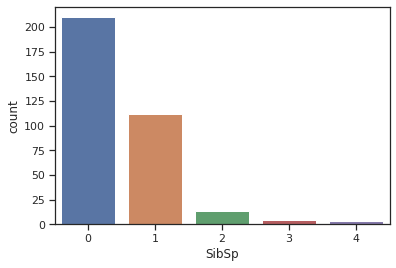

In [164]:
sns.countplot(train['SibSp'][train['Survived'] == 1])

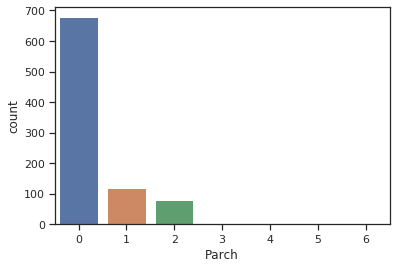

In [165]:
sns.countplot(train['Parch'])

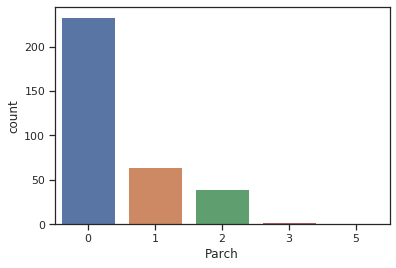

In [166]:
sns.countplot(train['Parch'][train['Survived'] == 1])

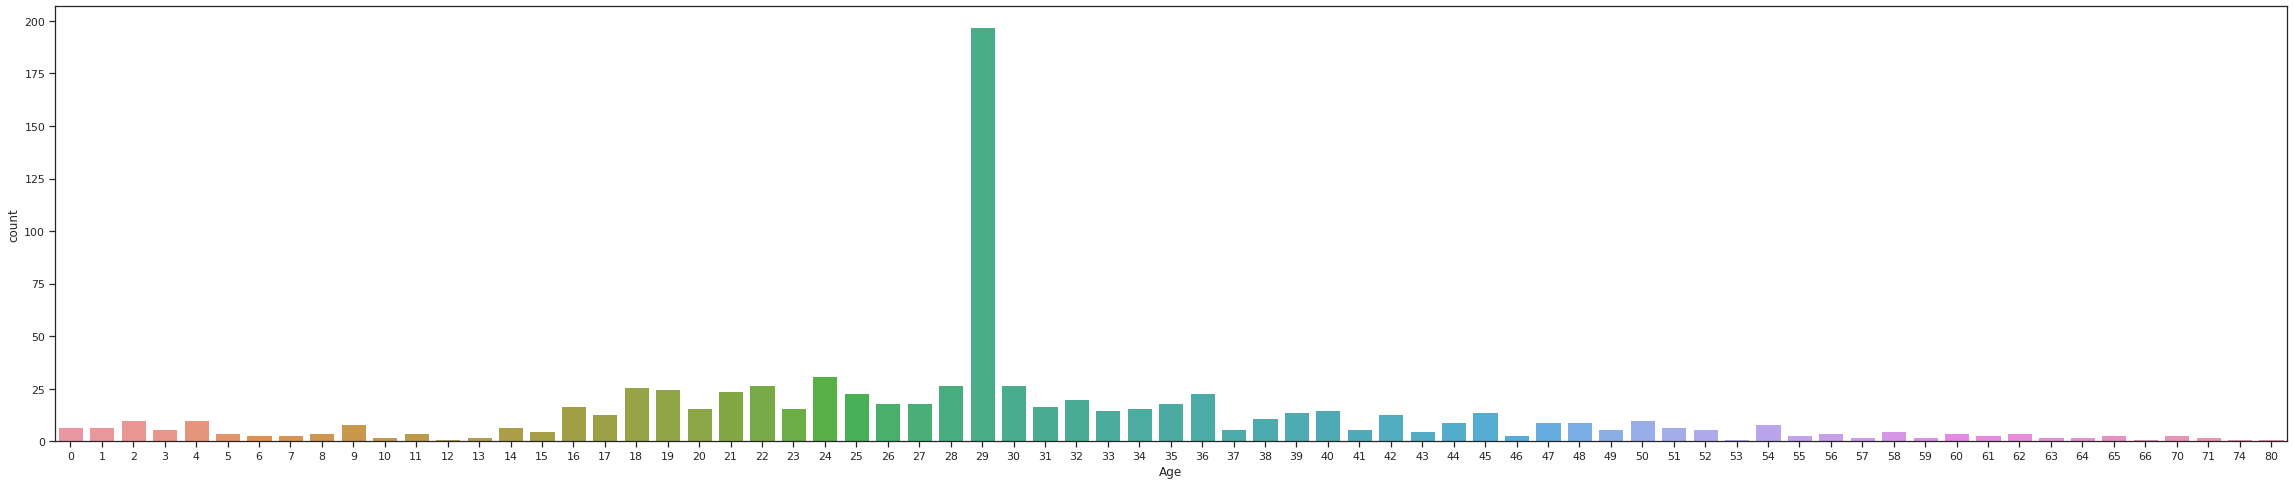

In [167]:
f, ax = plt.subplots(figsize=(40, 8))
fig=sns.countplot(train['Age'])

Text(0, 0.5, 'Survival Probability')

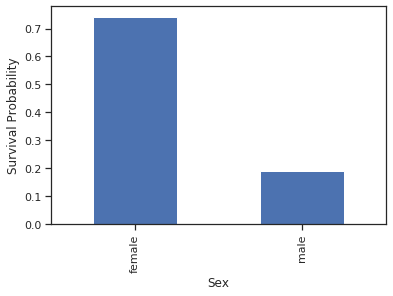

In [168]:
plt = train[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

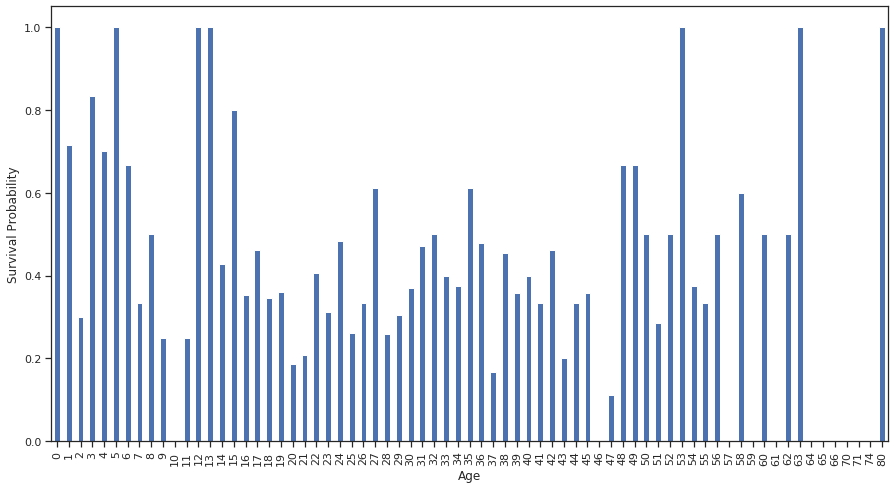

In [169]:
plt = train[['Age', 'Survived']].groupby('Age').mean().Survived.plot(kind='bar',figsize=(15,8))
plt.set_xlabel('Age')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

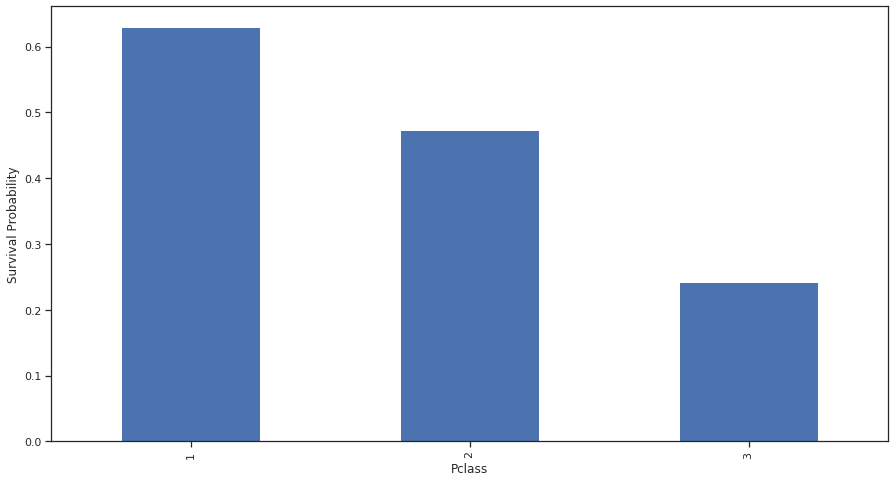

In [170]:
plt = train[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar',figsize=(15,8))
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

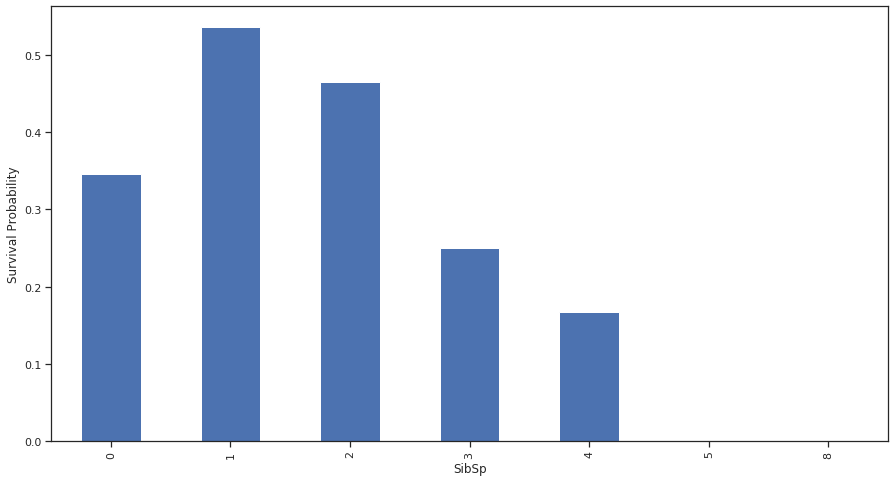

In [171]:
plt = train[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar',figsize=(15,8))
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

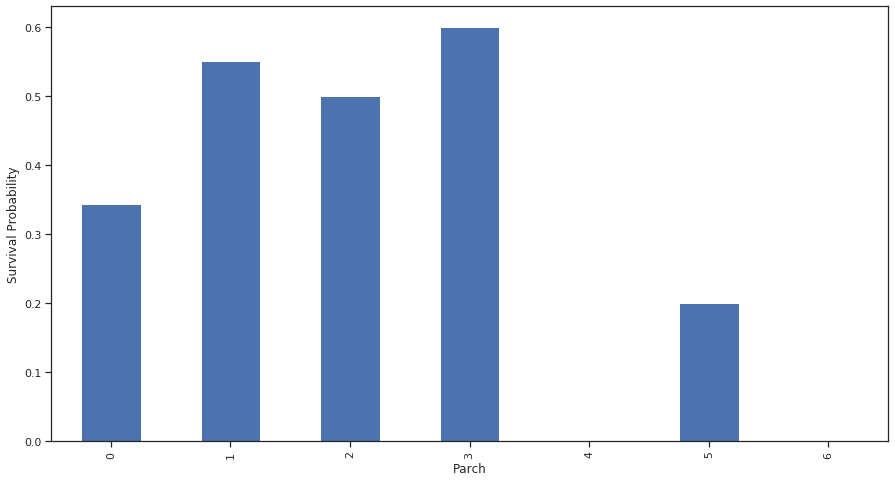

In [172]:
plt = train[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar',figsize=(15,8))
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

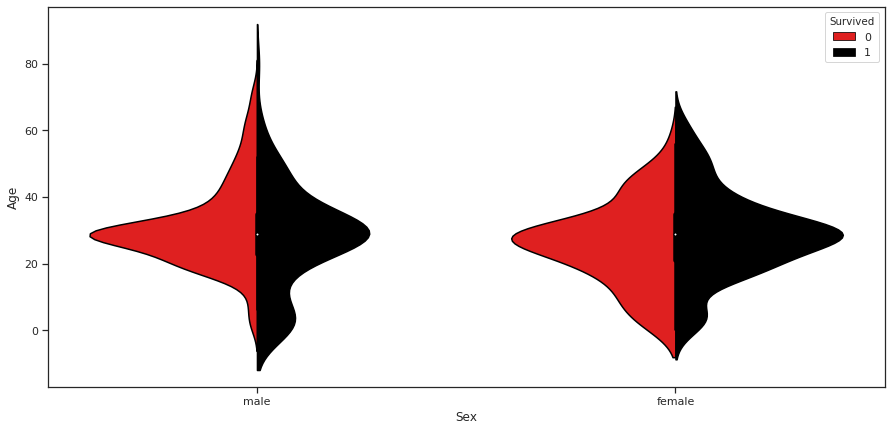

In [173]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, palette={0: "red", 1: "black"});

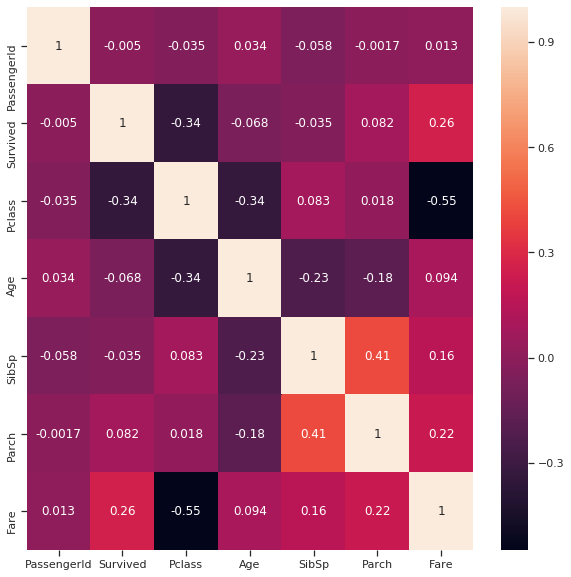

In [174]:
fig = plt.figure(figsize=(10, 10))
corr = train.corr()
sns.heatmap(corr, annot=True)

In [175]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [0]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [0]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [0]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [0]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)

In [181]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,Has_Cabin
0,0,3,1,22,0,7.2500,0,2,0
1,1,1,0,38,0,71.2833,1,2,1
2,1,3,0,26,0,7.9250,0,1,0
3,1,1,0,35,0,53.1000,0,2,1
4,0,3,1,35,0,8.0500,0,1,0


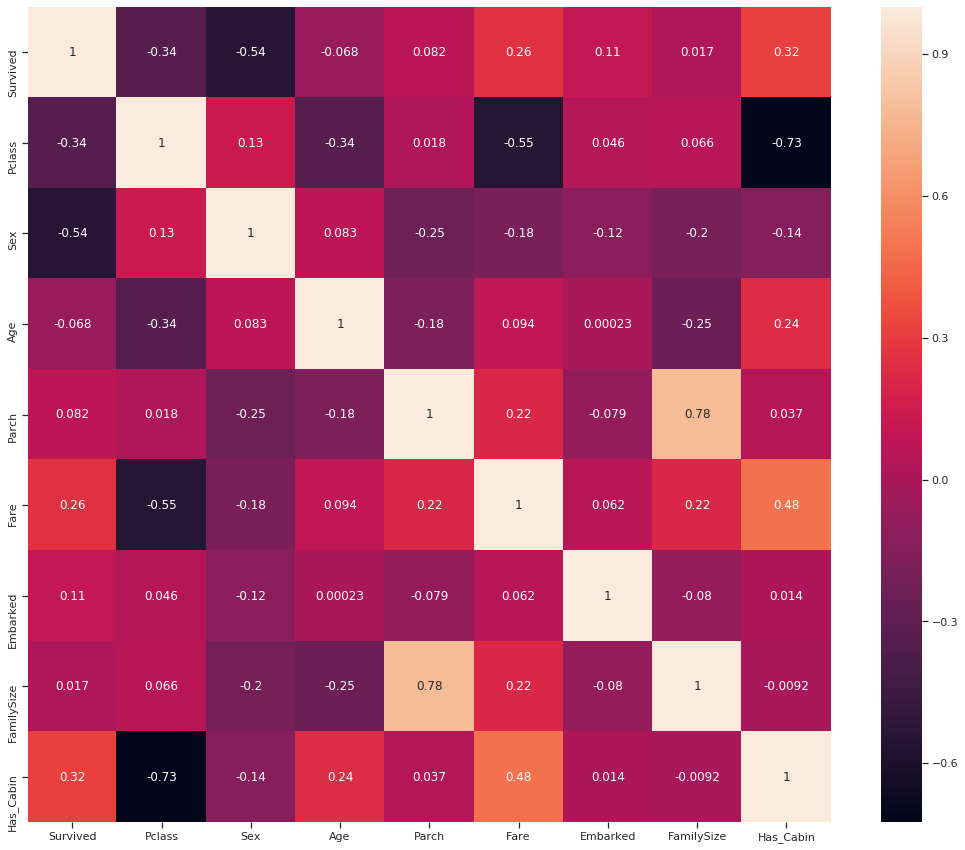

In [182]:
fig = plt.figure(figsize=(18, 15))
corr = train.corr()
sns.heatmap(corr, annot=True)

In [0]:
PassengerId = test['PassengerId'] 

In [0]:
test['Embarked'] = test['Embarked'].fillna('S')
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Age'] = test['Age'].astype(int)

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
test = test.drop(drop_elements, axis = 1)

In [185]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,Has_Cabin
0,3,1,34,0,7.8292,2,1,0
1,3,0,47,0,7.0000,0,2,0
2,2,1,62,0,9.6875,2,1,0
3,3,1,27,0,8.6625,0,1,0
4,3,0,22,1,12.2875,0,3,0


In [186]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Has_Cabin     0
dtype: int64

In [187]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Has_Cabin,0.866838
5,Embarked,0.235456
3,Parch,0.162399
4,Fare,0.002952
2,Age,-0.030683
6,FamilySize,-0.256708
0,Pclass,-0.619267
1,Sex,-2.491104


In [188]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [189]:

LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test).astype(int)
acc_log = round(LR.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.02

In [190]:

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test).astype(int)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.0

In [191]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
knn.predict(X_test).astype(int)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.36

In [192]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(X_train, Y_train)
dc_tree.predict(X_test).astype(int)
acc_dc_tree = round(dc_tree.score(X_train, Y_train) * 100, 2)
acc_dc_tree

98.09

In [193]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.predict(X_test).astype(int)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.09

In [194]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],'Confidence Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_dc_tree] })
models.sort_values(by='Confidence Score', ascending=False)

,Model,Confidence Score
3,Random Forest,98.09
4,Decision Tree,98.09
0,Support Vector Machines,89.00
1,KNN,80.36
2,Logistic Regression,80.02


In [0]:
submission = pd.DataFrame({ "PassengerId": PassengerId, "Survived": Y_pred })
submission.to_csv("output.csv", index=False)